In [91]:
from minisom import MiniSom
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 16.8,6.72
import math
import sklearn
from sklearn.preprocessing import MinMaxScaler
import sklearn
from scipy.stats import zscore
import somoclu
import seaborn
#import Orange
from mpl_toolkits.mplot3d import Axes3D
#%matplotlib inline
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import inconsistent
from Orange.projection.pca import PCA
from scipy.cluster.hierarchy import fcluster
from sklearn.utils import shuffle
from sklearn.neighbors.kde import KernelDensity
from time import time
import sompy
from sklearn import preprocessing

In [4]:
filedata= 'D:/Development/mestrado/uma/dataset/callsinfo.csv'
df = pd.read_csv(filedata, engine='python', sep=';')
df.head()

,Retainability,HOSR,RSRP,RSRQ,SINR,Throughput,Distance,FaultCause
0,0.853,0.609,-66.728,-20.042,10.836,148.692,0.713,1
1,0.909,0.800,-61.816,-19.071,15.236,205.652,0.601,1
2,0.963,0.818,-61.778,-18.862,16.395,251.339,0.587,1
3,0.940,0.889,-63.843,-19.436,14.816,232.213,0.586,1
4,0.952,0.900,-61.796,-19.403,14.402,191.574,0.629,1


In [6]:
sorted_df = df.sort_values('FaultCause')

In [13]:
#sorted_df.groupby(['FaultCause'])[["Retainability", "HOSR", "RSRP","RSRQ","SINR","Throughput","Distance"]].count()
#sorted_df[0:len(sorted_df)-3000].groupby(['FaultCause']).count()
base = shuffle(sorted_df[0:len(sorted_df)-3000])

In [100]:
len(base)

1559

In [38]:
# split into train and test sets
train_size = int(len(base) * 0.2) ### in order to divide as 550 and 4009
test_size = len(base) - train_size
train_df, test_df = base[0:train_size], base[train_size:len(base)]


# normalize the dataset
train_df_zscore = train_df.apply(zscore)
test_df_zscore = test_df.apply(zscore)

###transform pandas dataframe to numpy
train_df_zscore = train_df_zscore.values
train = train_df_zscore.astype('float32')

test_df_zscore = test_df_zscore.values
test = test_df_zscore.astype('float32')


In [39]:
train_df.groupby(['FaultCause']).count()

,Retainability,HOSR,RSRP,RSRQ,SINR,Throughput,Distance
FaultCause,,,,,,,
1,42,42,42,42,42,42,42
2,22,22,22,22,22,22,22
3,17,17,17,17,17,17,17
4,49,49,49,49,49,49,49
5,50,50,50,50,50,50,50
6,54,54,54,54,54,54,54
7,77,77,77,77,77,77,77


In [69]:
print(train.shape)
print(test.shape)

(311, 8)
(1248, 8)


In [94]:
min_max_scaler = preprocessing.MinMaxScaler()
np_scaled = min_max_scaler.fit_transform(train_df[["Retainability", "HOSR", "RSRP","RSRQ","SINR","Throughput","Distance"]])
train_df_normalized = pd.DataFrame(np_scaled)

In [97]:
train_df_normalized['FaultCause'] = train_df['FaultCause'].values
train_df_normalized.head()
train_df_normalized.to_csv(path_or_buf='D:/Development/mestrado/uma/dataset/train_norm_callsinfo2.csv', sep=',')

In [105]:
#train_df[["Retainability", "HOSR", "RSRP","RSRQ","SINR","Throughput","Distance"]].apply(zscore)
t1 = base[["Retainability", "HOSR", "RSRP","RSRQ","SINR","Throughput","Distance"]].apply(zscore)
t1['FaultCause'] = base['FaultCause'].values
t1.to_csv(path_or_buf='D:/Development/mestrado/uma/dataset/base_norm_callsinfo.csv', sep=',')
#train_df['FaultCause'].values

In [80]:
train_df.to_csv(path_or_buf='D:/Development/mestrado/uma/dataset/train_callsinfo.csv', sep=',')

In [49]:
#n_rows, n_columns = 100, 160
n_rows, n_columns = 20,20
#som = somoclu.Somoclu(n_columns, n_rows, compactsupport=False)
som = somoclu.Somoclu(n_columns, n_rows, compactsupport=False,initialization="pca",gridtype='rectangular',neighborhood='bubble')
#%time som.train(dataset,epochs=1000, radius0=10, radiusN=2, radiuscooling='linear', scale0=0.1, scaleN=0.01, scalecooling='linear')
%time som.train(train,epochs=20000, radius0=10, radiusN=0, radiuscooling='linear', scale0=0.1, scaleN=0.01, scalecooling='linear')

Wall time: 2min 12s


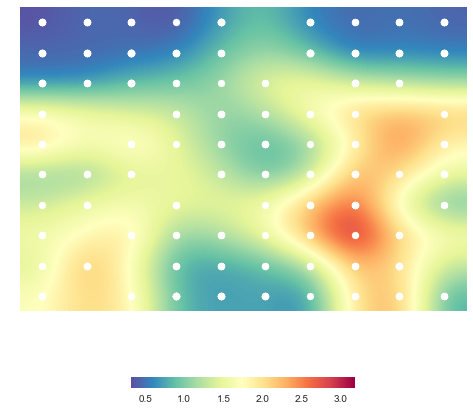

<module 'matplotlib.pyplot' from 'C:\\Anaconda2\\envs\\py36\\lib\\site-packages\\matplotlib\\pyplot.py'>

In [47]:
som.view_umatrix(bestmatches=True,colorbar=1)

In [107]:
W = som.codebook.reshape((som.codebook.shape[0] * som.codebook.shape[1], som.codebook.shape[2]))
# generate the linkage matrix
Z = linkage(W, 'ward')
c, coph_dists = cophenet(Z, pdist(W))
c

0.72833071442846609

In [51]:
import neurolab

Epoch: 20; Error: 33.47107899571702;
Epoch: 40; Error: 32.57011892315738;
Epoch: 60; Error: 32.557669784828725;
Epoch: 80; Error: 32.5609660583841;
Epoch: 100; Error: 32.56182594218226;
Epoch: 120; Error: 32.561984481055106;
Epoch: 140; Error: 32.56201288177206;
Epoch: 160; Error: 32.562018071346856;
Epoch: 180; Error: 32.5620190344334;
Epoch: 200; Error: 32.56201921528249;
The maximum number of train epochs is reached


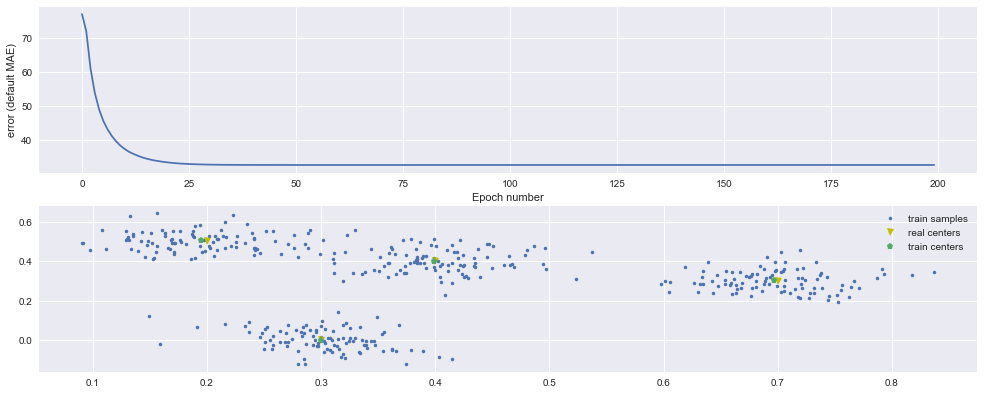

In [99]:
import numpy as np
import neurolab as nl
import numpy.random as rand

centr = np.array([[0.3, 0.0], [0.4, 0.4], [0.7, 0.3], [0.2, 0.5]])
rand_norm = 0.05 * rand.randn(100, 4, 2)
inp = np.array([centr + r for r in rand_norm])
inp.shape = (100 * 4, 2)
rand.shuffle(inp) 

# Create net with 2 inputs and 4 neurons
net = nl.net.newc([[0.0, 1.0],[0.0, 1.0]], 4)
# train with rule: Conscience Winner Take All algoritm (CWTA)
error = net.train(inp, epochs=200, show=20)

# Plot results:
import pylab as pl
pl.title('Classification Problem')
pl.subplot(211)
pl.plot(error)
pl.xlabel('Epoch number')
pl.ylabel('error (default MAE)')
w = net.layers[0].np['w']

pl.subplot(212)
pl.plot(inp[:,0], inp[:,1], '.', \
        centr[:,0], centr[:, 1] , 'yv', \
        w[:,0], w[:,1], 'p')
pl.legend(['train samples', 'real centers', 'train centers'])
pl.show()

In [64]:
inp

array([[ 0.23546035,  0.46688749],
       [ 0.36221996,  0.34950749],
       [ 0.1925582 ,  0.43310565],
       [ 0.40860997,  0.3393433 ],
       [ 0.74601169,  0.29295209],
       [ 0.75689135,  0.24306006],
       [ 0.21999857,  0.25203576],
       [ 0.64492318,  0.29222642],
       [ 0.77808771,  0.31583273],
       [ 0.20535306,  0.4522655 ],
       [ 0.6837961 ,  0.34232167],
       [ 0.11282878,  0.52278169],
       [ 0.23816435,  0.55355464],
       [ 0.41020969,  0.33066966],
       [ 0.68082647,  0.30551335],
       [ 0.60049745,  0.28995284],
       [ 0.17334366,  0.21233961],
       [ 0.43071518,  0.37876611],
       [ 0.36835649,  0.39232967],
       [ 0.79477667,  0.26909271],
       [ 0.67217767,  0.30254719],
       [ 0.44148283,  0.42593902],
       [ 0.21586153,  0.14179014],
       [ 0.21519222,  0.21562342],
       [ 0.32985458,  0.36242376],
       [ 0.12788892,  0.5083709 ],
       [ 0.19458599,  0.55086914],
       [ 0.40866396,  0.41215347],
       [ 0.17984841,

In [58]:
centr = np.array([[0.2, 0.2], [0.4, 0.4], [0.7, 0.3], [0.2, 0.5]])
rand_norm = 0.05 * rand.randn(100, 4, 2)

In [59]:
centr

array([[ 0.2,  0.2],
       [ 0.4,  0.4],
       [ 0.7,  0.3],
       [ 0.2,  0.5]])

In [63]:
net.sim(inp)

array([[ 1.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  1.],
       [ 1.,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  1.,  0.],
       [ 0.,  0.,  1.,  0.],
       [ 0.,  1.,  0.,  0.]])

In [65]:
dataset = [[2.7810836,2.550537003,0],
	[1.465489372,2.362125076,0],
	[3.396561688,4.400293529,0],
	[1.38807019,1.850220317,0],
	[3.06407232,3.005305973,0],
	[7.627531214,2.759262235,1],
	[5.332441248,2.088626775,1],
	[6.922596716,1.77106367,1],
	[8.675418651,-0.242068655,1],
	[7.673756466,3.508563011,1]]

AttributeError: 'list' object has no attribute 'shape'

In [104]:
import numpy as np
import neurolab as nl

# Create train samples
input = np.array([[-3, 0], [-2, 1], [-2, -1], [0, 2], [0, 1], [0, -1], [0, -2], 
                                                        [2, 1], [2, -1], [3, 0]])
target = np.array([[1, 0], [1, 0], [1, 0], [0, 1], [0, 1], [0, 1], [0, 1], 
                                                        [1, 0], [1, 0], [1, 0]])

# Create network with 2 layers:4 neurons in input layer(Competitive)
# and 2 neurons in output layer(liner)
net = nl.net.newlvq(nl.tool.minmax(input), 4, [.6, .4])
# Train network
error = net.train(input, target, epochs=1000, goal=-1)

# Plot result
import pylab as pl
xx, yy = np.meshgrid(np.arange(-3, 3.4, 0.2), np.arange(-3, 3.4, 0.2))
xx.shape = xx.size, 1
yy.shape = yy.size, 1
i = np.concatenate((xx, yy), axis=1)
o = net.sim(i)
grid1 = i[o[:, 0]>0]
grid2 = i[o[:, 1]>0]

class1 = input[target[:, 0]>0]
class2 = input[target[:, 1]>0]

pl.plot(class1[:,0], class1[:,1], 'bo', class2[:,0], class2[:,1], 'go')
pl.plot(grid1[:,0], grid1[:,1], 'b.', grid2[:,0], grid2[:,1], 'gx')
pl.axis([-3.2, 3.2, -3, 3])
pl.xlabel('Input[:, 0]')
pl.ylabel('Input[:, 1]')
pl.legend(['class 1', 'class 2', 'detected class 1', 'detected class 2'])
pl.show()

TypeError: slice indices must be integers or None or have an __index__ method